In [116]:
ori_tweet = pd.read_csv("volvo0701-1101.csv", error_bad_lines=False)
ori_tweet["Tweet_time"] = pd.to_datetime(ori_tweet["Tweet_time"])

In [92]:
import sklearn

In [124]:
tweet = ori_tweet

In [231]:
latest = tweet[["Tweet_time", "Tweet_username", "Tweet_content"]].sort_values("Tweet_time", ascending=False).head(5)


In [236]:
latest

,Tweet_time,Tweet_username,Tweet_content
7,2020-09-30 23:56:00,Red Deer Toyota,🎉 Bill and Debra just bought a 2015 Volvo S60 ...
14,2020-09-30 23:37:13,Wabco Poland,Clutch Servo 4620121000\t\tPrice: €428.58 #Clu...
2,2020-09-30 23:30:41,Dent Tech UAE,"📷 #volvo we remove any car Dent without paint,..."
9,2020-09-30 23:12:06,Aiman I. Abdullah,"Also yes, the direct-injection engine in the P..."
4,2020-09-30 22:24:14,Volksnation,#wcw\t\t@Kirbyy.lee_v40 \t\tShop:\t \t•\t•\t•\...


In [225]:
a.values

array([[Timestamp('2020-09-30 23:56:00'), 'Red Deer Toyota',
        "🎉 Bill and Debra just bought a 2015 Volvo S60 to replace another Volvo. \t\t🐴 He's super excited to have a few more horses under the hood.\t\t👍 We are glad our veteran product advisor Amy Larsen was able to get you the vehicle you love!\t\t#volvo #reddeertoyota #reddeer #awd"],
       [Timestamp('2020-09-30 23:37:13'), 'Wabco Poland',
        'Clutch Servo 4620121000\t\tPrice:\xa0€428.58 #ClutchControls\t\t#KÄSSBOHRER\xa0#daf #evobus #iveco #mercedesbenz #schmitz #vdlbus #volvo\t\t \t#wabco\xa0#wabcoparts\xa0#truckparts\xa0#trailerparts\xa0#offhighwayparts\xa0#wabcosolutions\xa0#truck\xa0#car\xa0#trailer\xa0#offhighway\xa0#automotive'],
       [Timestamp('2020-09-30 23:30:41'), 'Dent Tech UAE',
        '📷 #volvo we remove any car Dent without paint, the job can be done in short time at your place, because we care your car🚙, Make your car again new, Call us for more details 📞00971559888165 . . . . . #dubaicars #dubai 

In [125]:
positive = sum(tweet["sentiment_score"] > 50)
neutral = sum(np.isclose(tweet["sentiment_score"], 50))
negative = sum(tweet["sentiment_score"] < 50)

In [40]:
positive, neutral, negative

(52.450641999171616, 35.958856827281515, 11.590501173546873)

In [144]:
tweet_df_1D = ori_tweet[["Tweet_time", "sentiment_score"]].groupby(pd.PeriodIndex(key='Tweet_time', freq='1D', convention='start')).mean()

TypeError: __new__() got an unexpected keyword argument convention

In [142]:
tweet_df_1D["sentiment_score"]

Tweet_time
2020-07-01    59.145822
2020-07-02    57.286297
2020-07-03    58.049019
2020-07-04    59.885315
2020-07-05    60.869461
                ...    
2020-09-26    59.203387
2020-09-27    58.111476
2020-09-28    57.382831
2020-09-29    58.348132
2020-09-30    59.852796
Freq: D, Name: sentiment_score, Length: 92, dtype: float64

[59.15,
 57.29,
 58.05,
 59.89,
 60.87,
 60.47,
 59.3,
 57.76,
 56.89,
 56.0,
 56.15,
 54.33,
 57.34,
 58.41,
 59.05,
 58.56,
 59.62,
 56.5,
 57.3,
 57.62,
 56.13,
 58.86,
 60.34,
 58.15,
 57.54,
 61.23,
 58.43,
 58.97,
 59.94,
 57.95,
 56.84,
 56.27,
 59.65,
 57.71,
 60.41,
 60.71,
 58.17,
 57.52,
 59.75,
 56.69,
 59.03,
 58.22,
 57.42,
 57.21,
 57.2,
 58.49,
 57.02,
 56.06,
 57.1,
 57.55,
 56.1,
 57.64,
 57.22,
 56.22,
 58.25,
 57.47,
 58.09,
 59.09,
 59.06,
 58.21,
 58.33,
 58.77,
 61.09,
 56.6,
 56.45,
 57.17,
 56.66,
 56.16,
 61.78,
 58.42,
 55.27,
 58.88,
 56.88,
 56.7,
 61.21,
 57.28,
 58.93,
 58.57,
 57.31,
 57.89,
 60.69,
 58.9,
 56.79,
 60.58,
 58.03,
 56.87,
 58.7,
 59.2,
 58.11,
 57.38,
 58.35,
 59.85]

In [132]:
ori_tweet[["Tweet_time", "sentiment_score"]].

,Tweet_time,sentiment_score
0,2020-09-30 20:58:51,69.261364
1,2020-09-30 20:15:12,81.666667
2,2020-09-30 23:30:41,60.606061
3,2020-09-30 22:15:11,37.500000
4,2020-09-30 22:24:14,50.000000
...,...,...
10760,2020-07-01 04:20:07,52.984848
10761,2020-07-01 02:33:46,50.000000
10762,2020-07-01 03:15:58,50.000000
10763,2020-07-01 02:43:33,62.333333


In [130]:
positive = round(sum(tweet["sentiment_score"] > 50) / len(tweet), 2)
neutral = round(sum(np.isclose(tweet["sentiment_score"], 50)) / len(tweet), 2)
negative = round(sum(tweet["sentiment_score"] < 50) / len(tweet), 2)

{"positive": positive, "neutral": neutral, "negative": negative}

{'positive': 0.53, 'neutral': 0.37, 'negative': 0.1}

In [120]:
np.isclose(ori_tweet["sentiment_score"], 50)

array([False, False, False, ...,  True, False,  True])

In [105]:
ss

array([69.26136364, 81.66666667, 60.60606061, ..., 50.        ,
       62.33333333, 50.        ])

In [104]:

ss = sklearn.preprocessing.minmax_scale(s, feature_range=(0, 100), axis=0, copy=True)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Import the dataset
tweet = pd.read_csv("volvo701-1001.csv")
tweet2 = pd.read_csv("volvo701-1001.csv")
tweet=tweet.replace(' ', np.nan)
tweet['Tweet_time']

0        2020-09-30 20:40:23
1        2020-10-24 15:05:24
2        2020-09-30 20:58:51
3        2020-09-30 20:15:12
4        2020-09-30 23:30:41
                ...         
14481    2020-07-01 02:55:38
14482    2020-07-01 02:33:46
14483    2020-07-01 03:15:58
14484    2020-07-01 02:43:33
14485    2020-07-01 04:13:01
Name: Tweet_time, Length: 14486, dtype: object

In [3]:
# Data Preprocessing
print("Shape of the dataframe is", tweet.shape)
print("The number of nulls in each column are \n", tweet.isna().sum())

Shape of the dataframe is (14486, 27)
The number of nulls in each column are 
 Tweet_url                    0
Tweet_id                     0
Tweet_user_id                0
Tweet_username               0
Tweet_account                0
Tweet_user_location       3387
Tweet_user_followers         0
Tweet_user_following         0
Tweet_time                   0
Tweet_location           13955
Tweet_country_code       13956
Tweet_content                0
Tweet_contain_links       3539
Tweet_image_urls          6902
Tweet_retweet_count          0
Tweet_reply_count            0
Tweet_like_count             0
Tweet_quote_links         6650
Retweet_url              14205
Retweet_id                   0
Retweet_username         14205
Retweet_account          14205
Retweet_time             14205
Retweet_location         14480
Retweet_content          14205
Retweet_contain_links    14280
Retweet_image_urls       14319
dtype: int64


In [4]:
t=tweet['Tweet_content'].to_list()
for i in range(10):
    print("tweet Number"+str(i+1)+": "+t[i])

tweet Number1: @RavenholmCLP Best thing is go to AliExpress and get the best specced rugged smartphone for your budget, which for me is £100 (Ulfefone Armour X, doogee S60 lite, oukitel WP5 or whatever) They're indestructible and you can jump start a car with them.
tweet Number2: It’s important for us all to find time to step away from our social feeds and take a breath. One way to incorporate a break into your day is in your morning routine. Instead of scrolling your feed while you drink your coffee, try sipping your latte outside while you take a walk.
tweet Number3: Follow Me! @brittneyinpink 	Loving my New @riversidetransport Merch! 	.	.	.	.	.	.	.	.	.	#Trucking #trucker #pinky #truckdriver #truckdriverlife  #volvo #freightliner #transportation 	* #RTIfamily	* #RTIcares	* #RTIsupportsWOMEN	* #RTIproud
tweet Number4: The #Volvo #XC60 won the AutoTrader 2020 #Award for “Best Car for Families”		It was praised the for its ease of parking, the interior quality, roominess, reliability and

In [5]:
tweet['Tweet_country_code'].value_counts().head(n=20)

US    175
GB    127
SE     36
IN     28
BR     26
ZA     20
CA     13
MY     12
SG     12
DE     10
NL     10
BE      8
IE      6
AE      6
PL      5
AU      4
KE      4
IT      3
ES      3
TR      2
Name: Tweet_country_code, dtype: int64

In [6]:
t1=tweet[~tweet['Tweet_username'].str.contains('Audi|audi|volvo|Volvo|SHEIN|fasting|KetoCycle')]

F:\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
F:\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


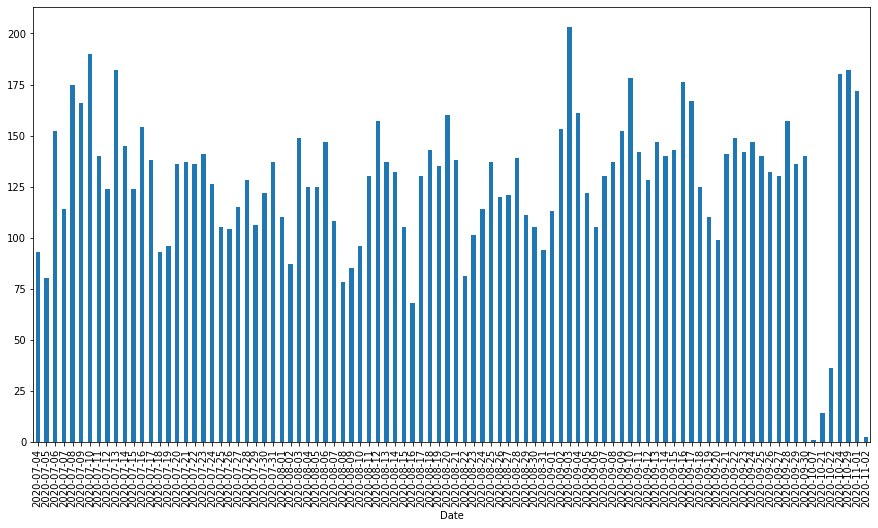

In [7]:
t1.loc[:,'Date']=pd.to_datetime(t1['Tweet_time']).dt.date
t1.loc[:,'Time']=pd.to_datetime(t1['Tweet_time']).dt.time
daily=t1.groupby('Date').size().iloc[3:-1]
daily.plot(x='Date',kind='bar',figsize=(15,8))


In [8]:
#top 10 retweet
top_retweet=t1.sort_values(by='Tweet_retweet_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_retweet_count']].head(10)
top_retweet

,Tweet_content,Tweet_username,Tweet_retweet_count
0,People on opposite ends of the political spect...,The Wall Street Journal,469
1,People on opposite ends of the political spect...,The Wall Street Journal,469
2,People on opposite ends of the political spect...,The Wall Street Journal,469
3,People on opposite ends of the political spect...,The Wall Street Journal,469
4,People on opposite ends of the political spect...,The Wall Street Journal,469
5,People on opposite ends of the political spect...,The Wall Street Journal,469
6,People on opposite ends of the political spect...,The Wall Street Journal,469
7,People on opposite ends of the political spect...,The Wall Street Journal,469
8,People on opposite ends of the political spect...,The Wall Street Journal,469
9,People on opposite ends of the political spect...,The Wall Street Journal,469


In [9]:
#top 10 reply
top_reply=t1.sort_values(by='Tweet_reply_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_reply_count']].head(10)
top_reply

,Tweet_content,Tweet_username,Tweet_reply_count
0,People on opposite ends of the political spect...,The Wall Street Journal,1120
1,People on opposite ends of the political spect...,The Wall Street Journal,1120
2,People on opposite ends of the political spect...,The Wall Street Journal,1120
3,People on opposite ends of the political spect...,The Wall Street Journal,1120
4,People on opposite ends of the political spect...,The Wall Street Journal,1120
5,People on opposite ends of the political spect...,The Wall Street Journal,1120
6,People on opposite ends of the political spect...,The Wall Street Journal,1120
7,People on opposite ends of the political spect...,The Wall Street Journal,1120
8,People on opposite ends of the political spect...,The Wall Street Journal,1120
9,People on opposite ends of the political spect...,The Wall Street Journal,1120


In [10]:
#top 10 like 
top_like=t1.sort_values(by='Tweet_like_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_like_count']].head(10)
top_like

,Tweet_content,Tweet_username,Tweet_like_count
0,People on opposite ends of the political spect...,The Wall Street Journal,2902
1,People on opposite ends of the political spect...,The Wall Street Journal,2902
2,People on opposite ends of the political spect...,The Wall Street Journal,2902
3,People on opposite ends of the political spect...,The Wall Street Journal,2902
4,People on opposite ends of the political spect...,The Wall Street Journal,2902
5,People on opposite ends of the political spect...,The Wall Street Journal,2902
6,People on opposite ends of the political spect...,The Wall Street Journal,2902
7,People on opposite ends of the political spect...,The Wall Street Journal,2902
8,People on opposite ends of the political spect...,The Wall Street Journal,2902
9,People on opposite ends of the political spect...,The Wall Street Journal,2902


In [11]:
# from nltk.tokenize import word_tokenize
# print(word_tokenize(t1['clean_text'][1]))

In [12]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k')
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 57096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 57096 missing from current font.
  font.set_text(s, 0, flags=flags)


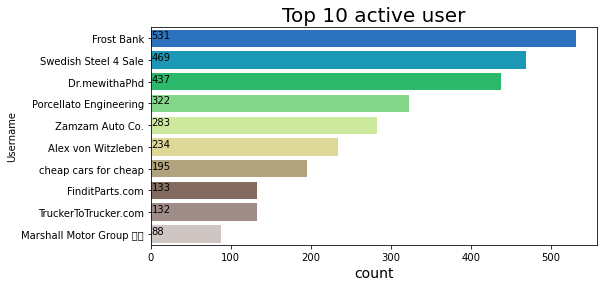

In [13]:
count=t1['Tweet_username'].value_counts()
df_count=pd.DataFrame()
df_count['Username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:10,:]
drawbarplot(x=df_count.activeCount,y=df_count.Username,xlabel='count',title='Top 10 active user',figsize=(8,4))

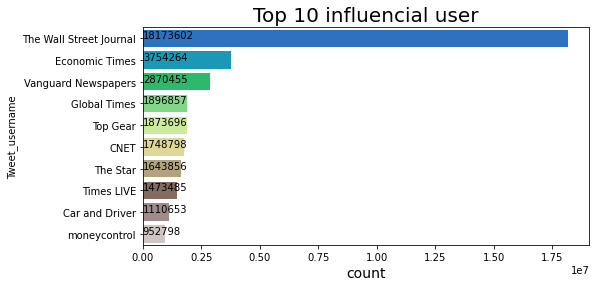

In [14]:
df_userfollower = t1.loc[:,['Tweet_username','Tweet_user_followers']]
df_userfollower.sort_values(by='Tweet_user_followers',ascending=False,inplace=True)
df_userfollower.drop_duplicates(subset='Tweet_username',keep='first',inplace=True)
df_count =df_userfollower.iloc[:10,:]
drawbarplot(x=df_count.Tweet_user_followers,y=df_count.Tweet_username,xlabel='count',title='Top 10 influencial user',figsize=(8,4))

In [15]:
# mentions_keys=list(['#volvo', '#volvoc30', '#volvos60', '#volvoxc90','vovloxc40','xc40bev','xc40','xc90','s60'])
st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','Volvo','car','cars'])
# st_words.update([s.lower() for s in mentions_keys])

In [251]:
wc.words_.values()

dict_values([1.0, 0.71875, 0.578125, 0.5625, 0.53125, 0.453125, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.40625, 0.390625, 0.390625, 0.390625, 0.34375, 0.34375, 0.34375, 0.328125, 0.3125, 0.296875, 0.296875, 0.28125, 0.265625, 0.265625, 0.265625, 0.25, 0.234375, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875, 0.21875])

In [248]:
wc.words_

{'XC90': 1.0,
 'S60': 0.71875,
 's': 0.578125,
 'XC40': 0.5625,
 'one': 0.53125,
 'today': 0.453125,
 'volvocar': 0.40625,
 'Onibus Bus': 0.40625,
 'Bus Buses': 0.40625,
 'BR NossoTransporte': 0.40625,
 'NossoTransporteSP Busologo': 0.40625,
 'Busologo Busologia': 0.40625,
 'Busologia InstaBusologos': 0.40625,
 'InstaBusologos InstaBus': 0.40625,
 'InstaBus NTSP': 0.40625,
 'Buses SP': 0.390625,
 'SP BR': 0.390625,
 'NTSP Omnibus': 0.390625,
 'service': 0.34375,
 'year': 0.34375,
 'Luxury': 0.34375,
 'time': 0.328125,
 'Comil Campione': 0.3125,
 'XC60': 0.296875,
 'us': 0.296875,
 'electric': 0.28125,
 'love': 0.265625,
 'SUV': 0.265625,
 'Design': 0.265625,
 'interior': 0.25,
 'Follow': 0.234375,
 'looking': 0.21875,
 'Thank': 0.21875,
 'brittneyinpink': 0.21875,
 'engine': 0.21875,
 'day': 0.21875,
 'truckdriver trucker': 0.21875,
 'trucker trucking': 0.21875,
 'trucking otr': 0.21875,
 'otr professional': 0.21875,
 'professional driver': 0.21875,
 'driver cdl': 0.21875,
 'cdl cdllif

In [247]:
wc = WordCloud(height=300,repeat=False,width=500,max_words=50,stopwords=st_words,colormap='terrain',background_color='white').generate(' '.join(t1['Tweet_content'].dropna().astype(str)))
# plt.figure(figsize = (16,16))
# plt.imshow(wc)
# plt.title('Tweets Wordcloud')
# plt.axis('off')
# plt.show()

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
import emoji
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        #count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        #count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags                           
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [18]:
tc = TextCounts()
df_feature =  tc.fit_transform(t1['Tweet_content'])
df_feature.head(20)

,count_words,count_mentions,count_hashtags,count_urls,count_emojis
0,44,1,0,0,0
1,54,0,0,0,0
2,20,2,12,0,0
4,40,0,6,0,3
5,26,0,14,0,0
6,16,6,7,0,5
7,55,1,0,0,0
8,8,3,0,0,0
9,30,0,10,0,0
10,48,0,4,0,3


In [19]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        #stopwords_list = st_words
        stopwords_list=STOPWORDS
        # Some words which might indicate a certain sentiment are kept via a whitelist        
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)        
        return clean_X

In [20]:
ct = CleanText()
t1.loc[:,'clean_text'] = ct.fit_transform(t1.loc[:,'Tweet_content'])
#Imputing '[no text]' value where there is no text
# df_final.loc[df_final['TweetBody'] == '','TweetBody'] = '[no text]'
t1['clean_text']

F:\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
F:\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0        best thing go aliexpress best spec rug smartph...
1        it’ import us find time step away social feed ...
2        follow love new merch truck trucker pinki truc...
4        volvo remov car dent without paint job done sh...
5        need part ford freightlin westernstar sterl na...
                               ...                        
14481    new arriv ccd barcod scanner xb fast scan spee...
14482    tuff protect anti glare screen protector volvo...
14483    china volvo car group volvo car own zhejiang g...
14484    yee pin volvo xc xc sensu inch clear temper gl...
14485    volvo my ecu tcu tune km acceler s→ power hp t...
Name: clean_text, Length: 12593, dtype: object

In [21]:
# EDA-IK

In [22]:
### Find the frequencies of the words that appear in tweets.

In [23]:
clean_words = ' '.join(tweet['Tweet_content'].dropna().astype(str))
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
freq(clean_words)

Frequency of Best is : 74
Frequency of thing is : 61
Frequency of is is : 2753
Frequency of go is : 221
Frequency of to is : 6106
Frequency of and is : 4467
Frequency of get is : 350
Frequency of the is : 8574
Frequency of best is : 198
Frequency of for is : 4553
Frequency of your is : 3273
Frequency of which is : 210
Frequency of me is : 266
Frequency of S60 is : 1679
Frequency of or is : 712
Frequency of you is : 2000
Frequency of can is : 668
Frequency of start is : 125
Frequency of a is : 5923
Frequency of car is : 662
Frequency of with is : 2289
Frequency of It’s is : 434
Frequency of important is : 374
Frequency of us is : 501
Frequency of all is : 1058
Frequency of find is : 406
Frequency of time is : 575
Frequency of step is : 378
Frequency of away is : 568
Frequency of from is : 1429
Frequency of our is : 1525
Frequency of social is : 539
Frequency of feeds is : 180
Frequency of take is : 492
Frequency of breath. is : 180
Frequency of One is : 246
Frequency of way is : 299
Fre

Frequency of like is : 464
Frequency of US is : 57
Frequency of You is : 352
Frequency of search is : 185
Frequency of All is : 97
Frequency of could is : 332
Frequency of after is : 167
Frequency of rear is : 58
Frequency of No is : 82
Frequency of I’ve is : 77
Frequency of ever is : 99
Frequency of use is : 306
Frequency of little is : 279
Frequency of feeds. is : 179
Frequency of nighttime is : 179
Frequency of routine is : 181
Frequency of reading is : 366
Frequency of book is : 231
Frequency of instead is : 205
Frequency of timeline. is : 181
Frequency of XC60 is : 234
Frequency of EV is : 103
Frequency of Charging is : 52
Frequency of #EUGreenDeal is : 217
Frequency of #ClimateActionNow is : 210
Frequency of #ElectricCars is : 258
Frequency of #ElectricVehicles is : 308
Frequency of #EVs is : 227
Frequency of #autos is : 165
Frequency of #Mercedes is : 118
Frequency of #BMW is : 487
Frequency of #PSA is : 231
Frequency of #Renault is : 265
Frequency of #Citroen is : 223
Frequency

Frequency of bit is : 76
Frequency of already is : 55
Frequency of Turbo is : 73
Frequency of #mitsubishi is : 83
Frequency of built is : 61
Frequency of V90 is : 115
Frequency of T4 is : 58
Frequency of #VolvoCars is : 113
Frequency of exceptional is : 76
Frequency of executive is : 65
Frequency of #Nissan is : 146
Frequency of BMW is : 117
Frequency of beautiful is : 72
Frequency of 6 is : 187
Frequency of @YouTube is : 80
Frequency of many is : 104
Frequency of come is : 83
Frequency of using is : 86
Frequency of 3 is : 207
Frequency of years is : 139
Frequency of #Cars is : 140
Frequency of 2.0 is : 91
Frequency of no is : 192
Frequency of if is : 251
Frequency of From is : 68
Frequency of #volvoxc90 is : 59
Frequency of experience is : 71
Frequency of why is : 88
Frequency of through is : 98
Frequency of More is : 110
Frequency of technology is : 70
Frequency of 2005 is : 54
Frequency of video is : 59
Frequency of xc90 is : 131
Frequency of top is : 69
Frequency of I’m is : 112
Fr

KeyboardInterrupt: 

In [ ]:
### Find the number of followers for the top 10 most active users

In [25]:
user_count = tweet['Tweet_username'].value_counts()
top_user_count = user_count.head(10)
top_username = top_user_count.index
top_username
for name in top_username:
    follower_num = tweet[tweet['Tweet_username'] == name].iloc[0, 6]
    print("The number of followers of", name, "is", follower_num)

The number of followers of Frost Bank is 21156
The number of followers of Swedish Steel 4 Sale is 2
The number of followers of Dr.mewithaPhd is 120
The number of followers of Porcellato Engineering is 26267
The number of followers of Zamzam Auto Co. is 297
The number of followers of John Clark Volvo is 221
The number of followers of Alex von Witzleben is 11758
The number of followers of cheap cars for cheap is 37
The number of followers of FinditParts.com is 1349
The number of followers of TruckerToTrucker.com is 11726


In [26]:
volvo_US = tweet[tweet["Tweet_country_code"] == "US"]
location_list = []
for location in volvo_US["Tweet_location"]:
    location_list += location[-2:].upper()

#volvo_US["Tweet_location"] = location
#volvo_US.replace(volvo_US["Tweet_location"], location)
location

'Minneapolis, MN'

In [27]:
car_model = ["S60", "XC40", "s60", "XC90", "XC60", "xc90", "T6"]
S60_count = 0
XC40_count = 0
XC90_count = 0
XC60_count = 0
T6_count = 0
clean_words2 = ' '.join(volvo_US['Tweet_content'].dropna().astype(str))
splitted = clean_words2.split(" ")
for tweets in splitted:
    if (tweets == (car_model[0] or car_model[2])):
        S60_count += 1
    if (tweets == (car_model[3] or car_model[5])):
        XC90_count += 1
    if (tweets == car_model[1]):
        XC40_count += 1
    if (tweets == car_model[4]):
        XC60_count += 1
    if (tweets == car_model[6]):
        T6_count += 1
print("The frequency for " + car_model[0] + " is " + str(S60_count))
print("The frequency for " + car_model[1] + " is " + str(XC40_count))
print("The frequency for " + car_model[3] + " is " + str(XC90_count))
print("The frequency for " + car_model[4] + " is " + str(XC60_count))
print("The frequency for " + car_model[6] + " is " + str(T6_count))

The frequency for S60 is 18
The frequency for XC40 is 7
The frequency for XC90 is 22
The frequency for XC60 is 0
The frequency for T6 is 8


In [28]:
# More EDA-EC


In [33]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [34]:
# Example
blob1 = TextBlob(tweet['Tweet_content'][0])
print(blob1.sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)


In [40]:
positive, neutral, negative

(52.450641999171616, 35.958856827281515, 11.590501173546873)

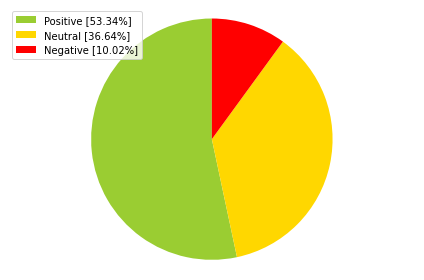

In [129]:
# Breaking down percentage of Positive, Neutral, Negative tweets within our dataset
tweet_content = tweet['Tweet_content'].values.tolist()

positive = 0
neutral = 0
negative = 0
polarity = 0

def percentage(part, whole):
    return 100* float(part)/float(whole)

for t in tweet_content:
    analysis = TextBlob(t)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    if (analysis.sentiment.polarity > 0.00):
        positive += 1
    if (analysis.sentiment.polarity < 0.00):
        negative += 1

total = len(tweet_content)
        
positive = percentage(positive, total)
neutral = percentage(neutral, total)
negative = percentage(negative, total)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

labels = ["Positive ["+str(positive)+"%]","Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [41]:
# Further breaking down each segment and adding labels
tweet_sentiment = tweet_content.copy()
for i in np.arange(total):
    analysis = TextBlob(tweet_sentiment[i])
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        tweet_sentiment[i] = 'Neutral'
    if (0 < analysis.sentiment.polarity <= 0.50):
        tweet_sentiment[i] = 'Slightly Positive'
    if (0.50 < analysis.sentiment.polarity <= 1.0):
        tweet_sentiment[i] = 'Positive'
    if (-1.0 <= analysis.sentiment.polarity <= -0.50):
        tweet_sentiment[i] = 'Slightly Negative'    
    if (-0.50 < analysis.sentiment.polarity <= 0):
        tweet_sentiment[i] = 'Negative'
        
        
tweet['Tweet_sentiment'] = tweet_sentiment
tweet['Tweet_sentiment']

0                 Positive
1        Slightly Positive
2        Slightly Positive
3                 Positive
4        Slightly Positive
               ...        
14481    Slightly Positive
14482             Negative
14483             Negative
14484    Slightly Positive
14485             Negative
Name: Tweet_sentiment, Length: 14486, dtype: object

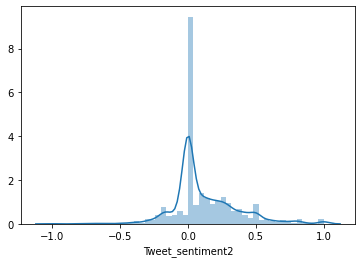

In [50]:
sns.distplot(t2["Tweet_sentiment2"])

In [42]:
t2 = tweet[["Tweet_content", "Tweet_sentiment"]]
t2["Tweet_content"] = t2["Tweet_content"].str.lower()
tweet_sentiment2= tweet_content.copy()

for i in np.arange(total):
    analysis2 = TextBlob(tweet_sentiment2[i])
    polarity += analysis2.sentiment.polarity
    tweet_sentiment2[i] = analysis2.sentiment.polarity
    

t2['Tweet_sentiment2'] = tweet_sentiment2
t2['s60'] = (t2["Tweet_content"].str.lower()
                            .str.contains("s60", regex=False, na=False)
                            .astype(int))
t2 = t2.loc[t2['s60'] == 1, :]
s60_mean = t2["Tweet_sentiment2"].mean()


<ipython-input-42-1fcbdefa7d43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2["Tweet_content"] = t2["Tweet_content"].str.lower()
<ipython-input-42-1fcbdefa7d43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Tweet_sentiment2'] = tweet_sentiment2
<ipython-input-42-1fcbdefa7d43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [51]:
t3 = tweet[["Tweet_content", "Tweet_sentiment"]]
t3["Tweet_content"] = t3["Tweet_content"].str.lower()
tweet_sentiment3= tweet_content.copy()
for i in np.arange(total):
    analysis3 = TextBlob(tweet_sentiment3[i])
    polarity += analysis3.sentiment.polarity
    tweet_sentiment3[i] = analysis3.sentiment.polarity
t3['Tweet_sentiment3'] = tweet_sentiment3
t3['t6'] = (t3["Tweet_content"].str.lower()
                            .str.contains("t6", regex=False, na=False)
                            .astype(int))
t3 = t3.loc[t3['t6'] == 1, :]
t6_mean = t3["Tweet_sentiment3"].mean()
t6_mean

<ipython-input-51-5c748a9ea131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3["Tweet_content"] = t3["Tweet_content"].str.lower()
<ipython-input-51-5c748a9ea131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3['Tweet_sentiment3'] = tweet_sentiment3
<ipython-input-51-5c748a9ea131>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.1078461823202587

In [52]:
t4 = tweet[["Tweet_content", "Tweet_sentiment"]]
t4["Tweet_content"] = t4["Tweet_content"].str.lower()
tweet_sentiment4= tweet_content.copy()
for i in np.arange(total):
    analysis4 = TextBlob(tweet_sentiment4[i])
    polarity += analysis4.sentiment.polarity
    tweet_sentiment4[i] = analysis4.sentiment.polarity
t4['Tweet_sentiment4'] = tweet_sentiment4
t4['xc60'] = (t4["Tweet_content"].str.lower()
                            .str.contains("xc60", regex=False, na=False)
                            .astype(int))
t4 = t4.loc[t4['xc60'] == 1, :]
xc60_mean = t4["Tweet_sentiment4"].mean()
xc60_mean

<ipython-input-52-e7c22466e421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4["Tweet_content"] = t4["Tweet_content"].str.lower()
<ipython-input-52-e7c22466e421>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4['Tweet_sentiment4'] = tweet_sentiment4
<ipython-input-52-e7c22466e421>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.18096759858782144

In [53]:
t5 = tweet[["Tweet_content", "Tweet_sentiment"]]
t5["Tweet_content"] = t5["Tweet_content"].str.lower()
tweet_sentiment5= tweet_content.copy()
for i in np.arange(total):
    analysis5 = TextBlob(tweet_sentiment5[i])
    polarity += analysis5.sentiment.polarity
    tweet_sentiment5[i] = analysis5.sentiment.polarity
t5['Tweet_sentiment5'] = tweet_sentiment5
t5['xc90'] = (t5["Tweet_content"].str.lower()
                            .str.contains("xc90", regex=False, na=False)
                            .astype(int))
t5 = t5.loc[t5['xc90'] == 1, :]
xc90_mean = t5["Tweet_sentiment5"].mean()
xc90_mean

<ipython-input-53-f4f45165d3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5["Tweet_content"] = t5["Tweet_content"].str.lower()
<ipython-input-53-f4f45165d3de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5['Tweet_sentiment5'] = tweet_sentiment5
<ipython-input-53-f4f45165d3de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.17436878713079326

In [63]:
ori_tweet = pd.read_csv("volvo701-1001.csv", error_bad_lines=False)
ori_tweet = ori_tweet.replace(' ', np.nan)
ori_tweet = ori_tweet[ori_tweet['Tweet_content'].str.contains('volvo|Volvo|c30|s60|xc40bev|xc90|xc40|xc60|c30|s60')]
ori_tweet["Tweet_time"] = pd.to_datetime(ori_tweet["Tweet_time"])

In [72]:
twt_scores = []

for c in ori_tweet["Tweet_content"]:
    twt_scores.append(TextBlob(c).sentiment.polarity)

In [74]:
ori_tweet["sentiment_score"] = twt_scores

In [88]:
ori_tweet.to_csv("volvo0701-1101.csv")

In [75]:
ori_tweet.to_csv("")

,Tweet_url,Tweet_id,Tweet_user_id,Tweet_username,Tweet_account,Tweet_user_location,Tweet_user_followers,Tweet_user_following,Tweet_time,Tweet_location,...,Retweet_url,Retweet_id,Retweet_username,Retweet_account,Retweet_time,Retweet_location,Retweet_content,Retweet_contain_links,Retweet_image_urls,sentiment_score
2,https://twitter.com/brittneyinpink/status/1311...,1311410199685668864,1120728898042572802,BrittneyInPink,brittneyinpink,"Kansas City, MO",79,6,2020-09-30 20:58:51,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385227
3,https://twitter.com/volvodundee/status/1311399...,1311399214941908993,1022453301852467200,Volvo Dundee and Edinburgh,volvodundee,NaN,2,0,2020-09-30 20:15:12,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633333
4,https://twitter.com/denttechae/status/13114484...,1311448413402271744,1200875744894898176,Dent Tech UAE,denttechae,"Dubai, United Arab Emirates",2,0,2020-09-30 23:30:41,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212121
5,https://twitter.com/BradPorcellato/status/1311...,1311429413226139648,25230082,Porcellato Engineering,BradPorcellato,"New Westminster, BC.",26267,19837,2020-09-30 22:15:11,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.250000
6,https://twitter.com/volksnation/status/1311431...,1311431690561167365,3034437273,Volksnation,volksnation,NY & CANADA & LA..SO MUCH MORE,365,2913,2020-09-30 22:24:14,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14480,https://twitter.com/StyleHerLovely1/status/127...,1278181567635095558,813665478199517185,Style Her Lovely,StyleHerLovely1,"Seattle, WA",90,444,2020-07-01 04:20:07,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059697
14482,https://twitter.com/marywillhite16/status/1278...,1278154801591676933,1244951307212840960,Mary Willhite,marywillhite16,NaN,49,0,2020-07-01 02:33:46,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
14483,https://twitter.com/AjeshShankar/status/127816...,1278165423423275008,1131516092264865792,"Ajesh Kumar Shankar, Advocate",AjeshShankar,"Bengaluru South, India",50,466,2020-07-01 03:15:58,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
14484,https://twitter.com/evelynbrinnon74/status/127...,1278157263820079105,1264262452465635329,Evelyn Brinnon,evelynbrinnon74,NaN,46,0,2020-07-01 02:43:33,NaN,...,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246667


In [161]:
data = tweet[tweet["Tweet_content"].str.lower().str.contains("xc40", regex=False, na=False)]["sentiment_score"]

In [181]:
bins = [0] + list(np.arange(5, 110, 10))

In [182]:
bins

[0, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105]

In [183]:
np.histogram(data, bins, weights=data)

(array([    0.        ,     0.        ,    52.5       ,   372.77777778,
         1644.72378956, 25092.84045171, 22841.53190386, 17733.62888652,
         9507.58593074,  1732.125     ,  1581.875     ]),
 array([  0,   5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105]))

In [192]:
len(t1)

449

In [215]:
t1 = tweet[~tweet['Tweet_username'].str.contains('volvo|Volvo')]
t1 = t1[~t1['Tweet_country_code'].isnull()]
loc = t1['Tweet_country_code'].value_counts() / len(t1)

other_val = sum(loc[4:])
loc = loc[:4].to_dict()
loc["OTHER"] = other_val

In [216]:
loc

{'US': 0.34966592427616927,
 'GB': 0.20935412026726058,
 'IN': 0.062360801781737196,
 'BR': 0.05790645879732739,
 'OTHER': 0.32071269487750553}

In [199]:
t1 = tweet[~tweet['Tweet_username'].str.contains('volvo|Volvo')]
t1 = t1[~t1['Tweet_country_code'].isnull()]
total = sum(t1['Tweet_country_code'].value_counts())
loc = t1['Tweet_country_code'].value_counts() / total
loc_df = pd.DataFrame({'country': loc.index, 'value': loc.values})
not_top_five = loc_df[4:]
val = sum(not_top_five['value'])
loc_df = loc_df[:4]
loc_df = loc_df.append({'country': 'Others', 'value': val}, ignore_index=True)

In [190]:
loc_df

,country,value
0,US,0.349666
1,GB,0.209354
2,IN,0.062361
3,BR,0.057906
4,Others,0.320713


In [187]:
(np.histogram(data, bins)[0])

array([  1,   0,   3,  13,  40, 500, 386, 259, 123,  20,  16], dtype=int64)

In [163]:
bin_means = (np.histogram(data, bins, weights=data)[0] /
             np.histogram(data, bins)[0])

In [164]:
bin_means

array([ 0.        , 17.5       , 25.70601852, 34.6774261 , 45.69970495,
       52.39786156, 64.16804732, 73.71533395, 82.82297138, 97.09375   ])

In [153]:
t6 = tweet[["Tweet_content", "Tweet_sentiment"]]
t6["Tweet_content"] = t5["Tweet_content"].str.lower()
tweet_sentiment6= tweet_content.copy()
for i in np.arange(total):
    analysis6 = TextBlob(tweet_sentiment6[i])
    polarity += analysis5.sentiment.polarity
    tweet_sentiment6[i] = analysis6.sentiment.polarity
    
t6['Tweet_sentiment6'] = tweet_sentiment6
t6['xc40'] = (t6["Tweet_content"].str.lower()
                            .str.contains("xc40", regex=False, na=False)
                            .astype(int))
t6 = t6.loc[t6['xc40'] == 1, :]
xc40_mean = t6["Tweet_sentiment6"].mean()
xc40_mean

KeyError: "['Tweet_sentiment'] not in index"

In [57]:
car_model_mean = [s60_mean, t6_mean, xc40_mean, xc60_mean, xc90_mean]
favorable = []
for i in car_model_mean:
    if i <= 0.5:
        favorable += ["Slightly Positive"]
favorable

['Slightly Positive',
 'Slightly Positive',
 'Slightly Positive',
 'Slightly Positive',
 'Slightly Positive']

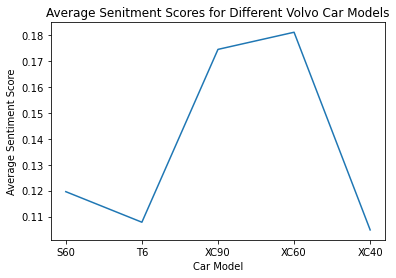

In [59]:
car_model_mean = [s60_mean, t6_mean, xc90_mean, xc60_mean, xc40_mean]
car_model = ["S60", "T6", "XC90", "XC60", "XC40"]
plt.plot(car_model, car_model_mean)
plt.xlabel("Car Model")
plt.ylabel("Average Sentiment Score")
plt.title("Average Senitment Scores for Different Volvo Car Models")
plt.show()